## This is designded to plot a scatter plot of invistble vs visible ITI to see if there is a large difference 

[[2368.41410342 -943.73715931]
 [-943.73715931 4737.63691182]]
(-0.2817353545883915, 0.2732860066366472)
SpearmanrResult(correlation=-0.32843137254901966, pvalue=0.19806893186877195)


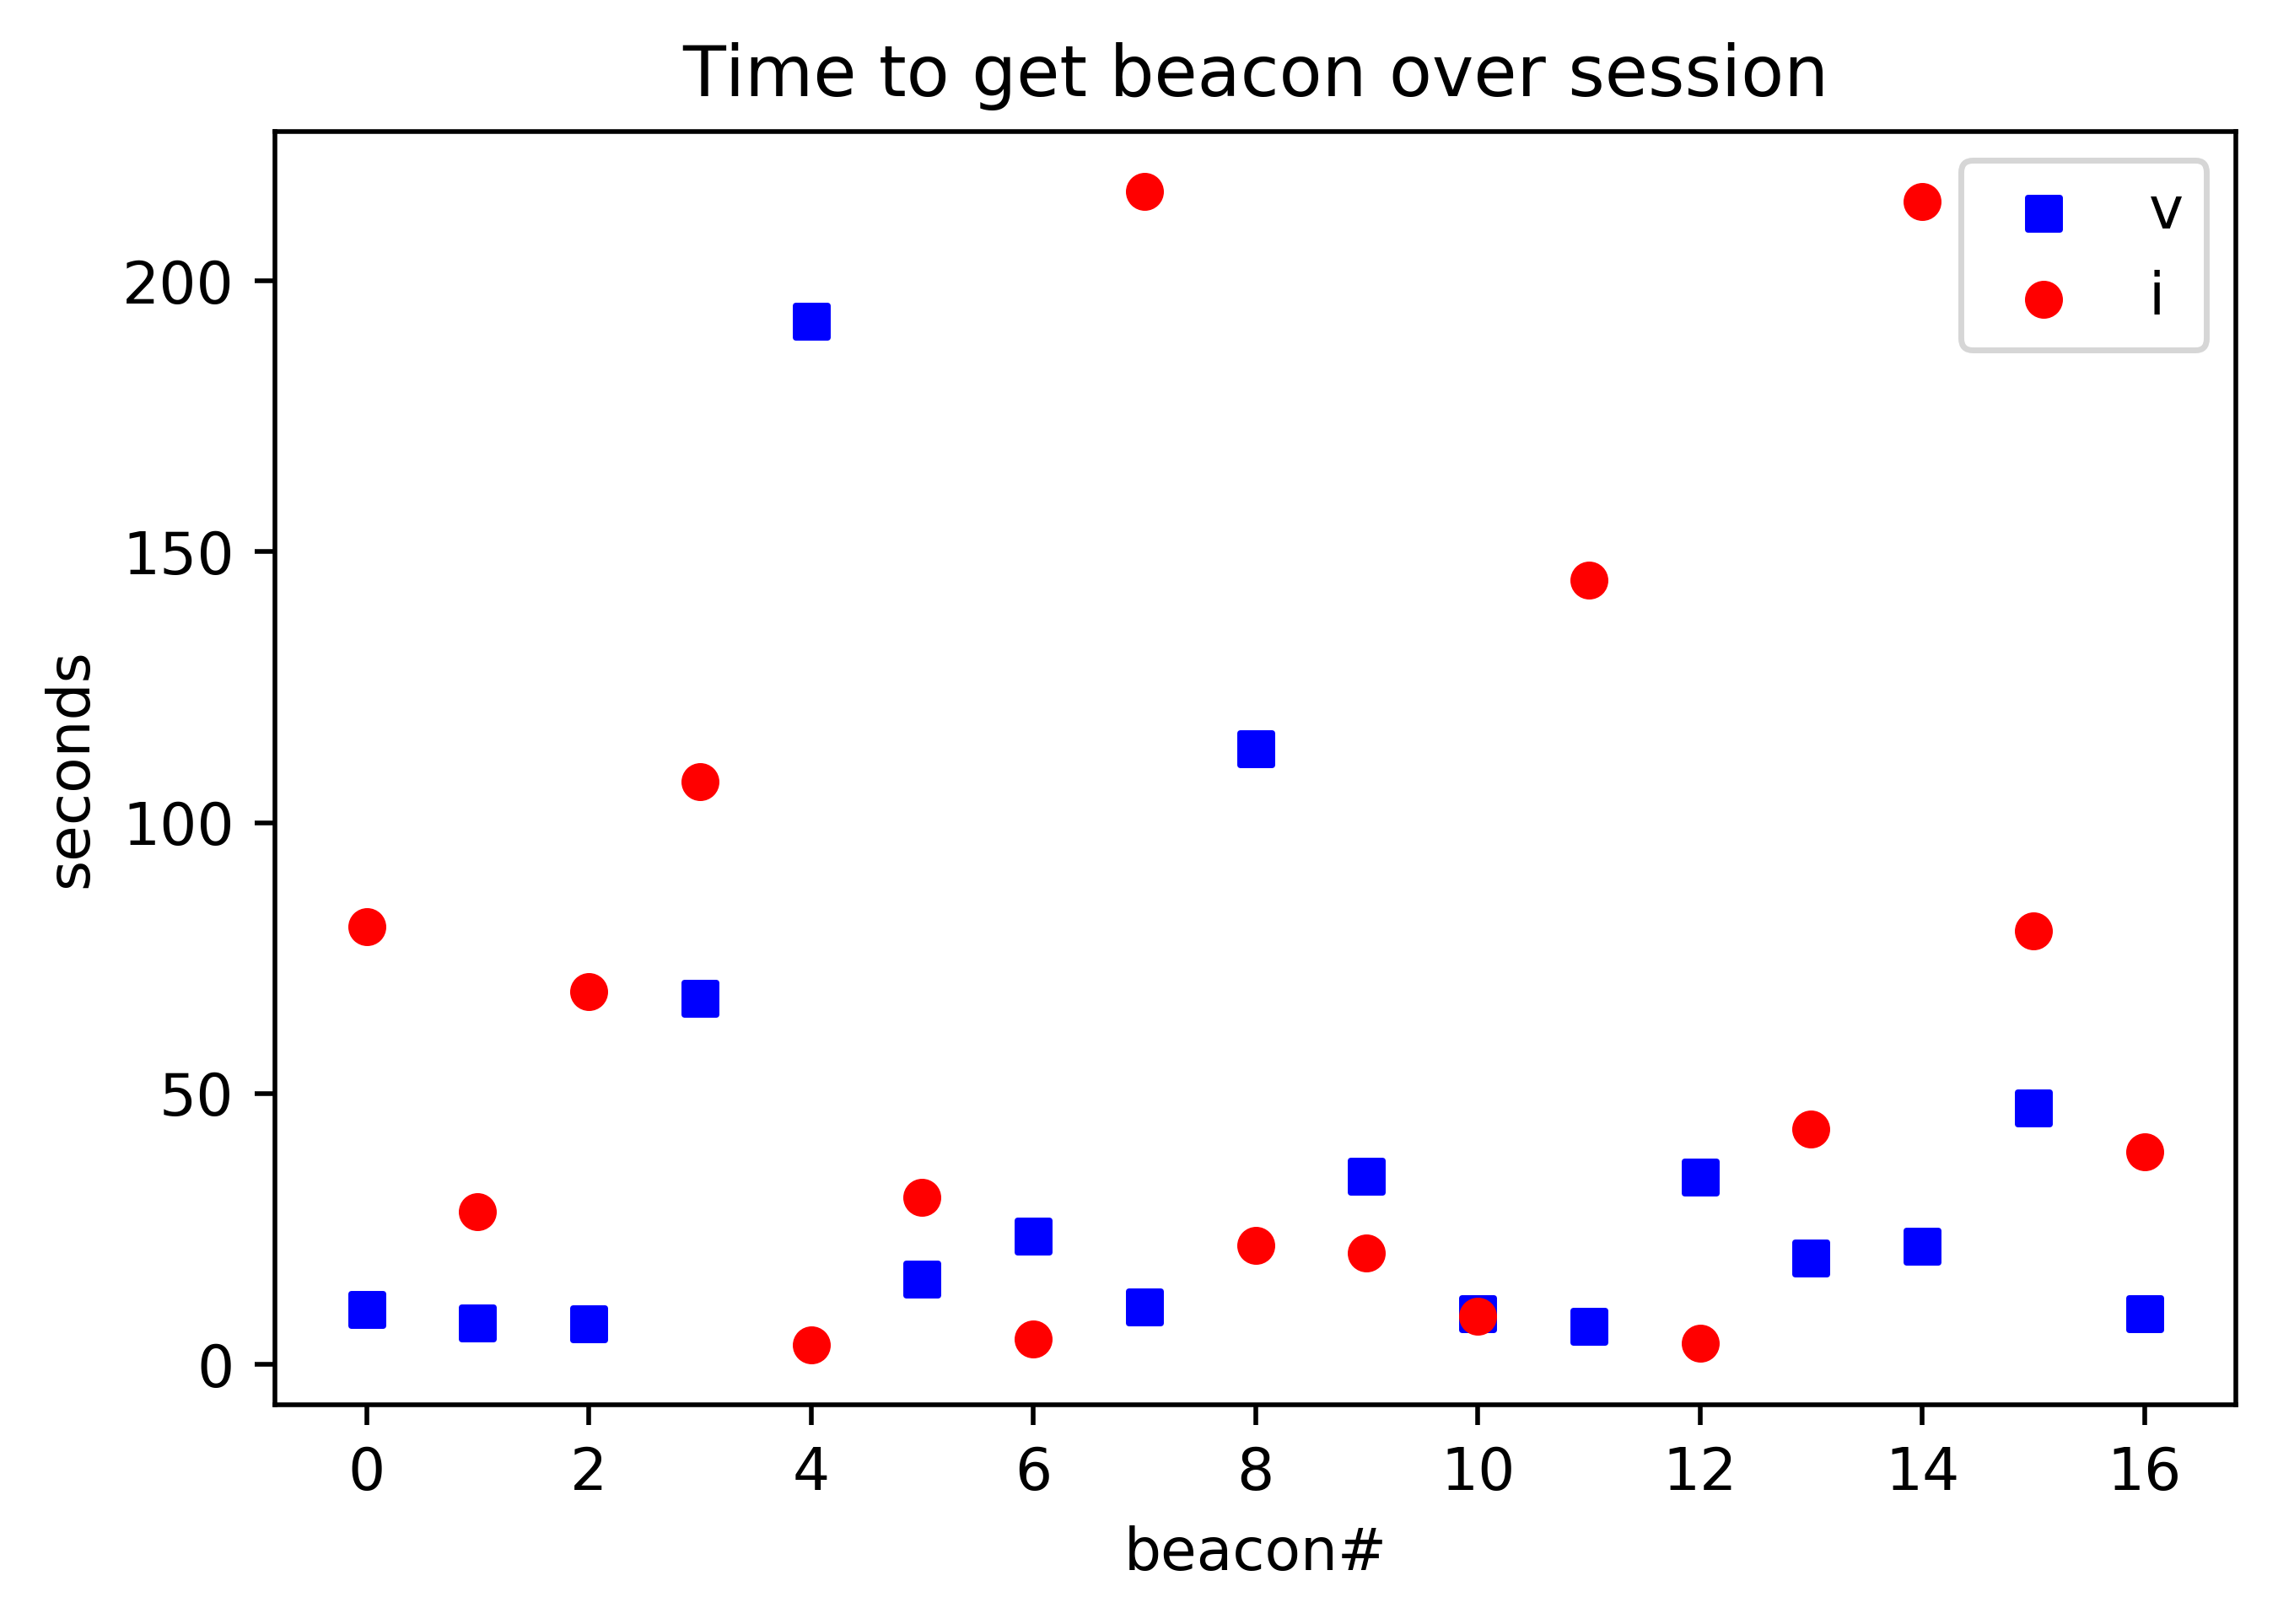

In [4]:
fig, ax = plt.subplots(dpi= 500)
diff=np.diff(beacon_Day86_fs2[0])
session = 'FS2_86'    
Beacons_vis = list(diff[1::2])
Beacons_invis = list(diff[::2])
time_range = np.arange(0,len(diff)/2)
ax.scatter(time_range,Beacons_vis,s=30, c='b', marker="s")
ax.scatter(time_range,Beacons_invis,s=30, c='r', marker="o")
ax.set_ylabel('seconds')
ax.set_xlabel('beacon#')
ax.set_title('Time to get beacon over session')
ax.legend('vi')
#ax.imshow()
from numpy import cov 
from scipy.stats import pearsonr,spearmanr

corr2 = spearmanr(Beacons_vis, Beacons_invis)
correlation = pearsonr (Beacons_vis, Beacons_invis)
covariance = cov(Beacons_vis, Beacons_invis)
print (covariance)
print (correlation)
print (corr2)

### Now plot it over all sessions not wih group statistics... all individual points 


### Need to calculate long diff list for each but not everytime visible and invisible. 

In [63]:
visible=[]
invisible = []
beacons = [beacon_Day86_fs1,beacon_Day87_fs1,beacon_Day88_fs1,beacon_Day89_fs1,beacon_Day90_fs1,beacon_Day91_fs1,beacon_Day92_fs1,beacon_Day93_fs1,beacon_Day86_fs2,beacon_Day87_fs2,beacon_Day88_fs2,beacon_Day89_fs2,beacon_Day90_fs2,beacon_Day91_fs2,beacon_Day92_fs2,beacon_Day93_fs2]
# all beacons all animals
for beacon in beacons:
    diff=np.diff(beacon[0])
    visible.extend(diff[1::2])
    invisible.extend (diff[0::2])

print (sum(visible))
print (sum(invisible))
    
print ((visible))
print ((np.median(np.array(visible))))

3516.2699999809265
21492.730000019073
[29.420000076293945, 50.80999994277954, 24.730000019073486, 14.429999828338623, 3.6000001430511475, 5.129999876022339, 5.329999923706055, 21.700000047683716, 15.65999984741211, 22.170000076293945, 31.230000019073486, 66.17000007629395, 28.579999923706055, 6.450000047683716, 20.25, 90.12999987602234, 16.479999780654907, 13.980000019073486, 5.319999933242798, 23.230000019073486, 11.929999828338623, 6.81000018119812, 9.069999933242798, 16.460000038146973, 25.94000005722046, 9.549999952316284, 59.05999994277954, 8.119999885559082, 3.680000066757202, 10.170000076293945, 21.960000038146973, 41.97000002861023, 16.91000008583069, 49.200000047683716, 17.319999933242798, 5.56000018119812, 3.179999828338623, 6.730000019073486, 4.680000066757202, 6.0299999713897705, 7.200000047683716, 28.37999987602234, 19.65999984741211, 11.450000047683716, 6.180000066757202, 17.02999997138977, 11.480000019073486, 18.019999980926514, 20.860000133514404, 10.769999980926514, 49

## List done, now simple statistics 

In [6]:
import scipy
visible_stats = scipy.stats.describe(visible)
visible_stats


DescribeResult(nobs=187, minmax=(3.1500000953674316, 192.5899999141693), mean=18.803582887598537, variance=410.9468141884066, skewness=4.545815740233529, kurtosis=30.552249406675024)

In [7]:
invisible_stats = scipy.stats.describe(invisible)
invisible_stats

DescribeResult(nobs=190, minmax=(3.640000104904175, 1169.2599999904633), mean=113.11963157904775, variance=27202.351704804278, skewness=3.2079016545121917, kurtosis=12.836041596097264)

# Covariance and correlations 

In [8]:
x_, y_ = np.array(visible+[18,19,19]), np.array(invisible) # adding means of visible so that both list lenght is 190 
x__, y__ = pd.Series(x_), pd.Series(y_)
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[  404.42766908,  -285.06729496],
       [ -285.06729496, 27202.3517048 ]])

In [9]:
r, p = scipy.stats.pearsonr(x_, y_)
r,p
sns.set()

## Plotting the histogram to see differences 

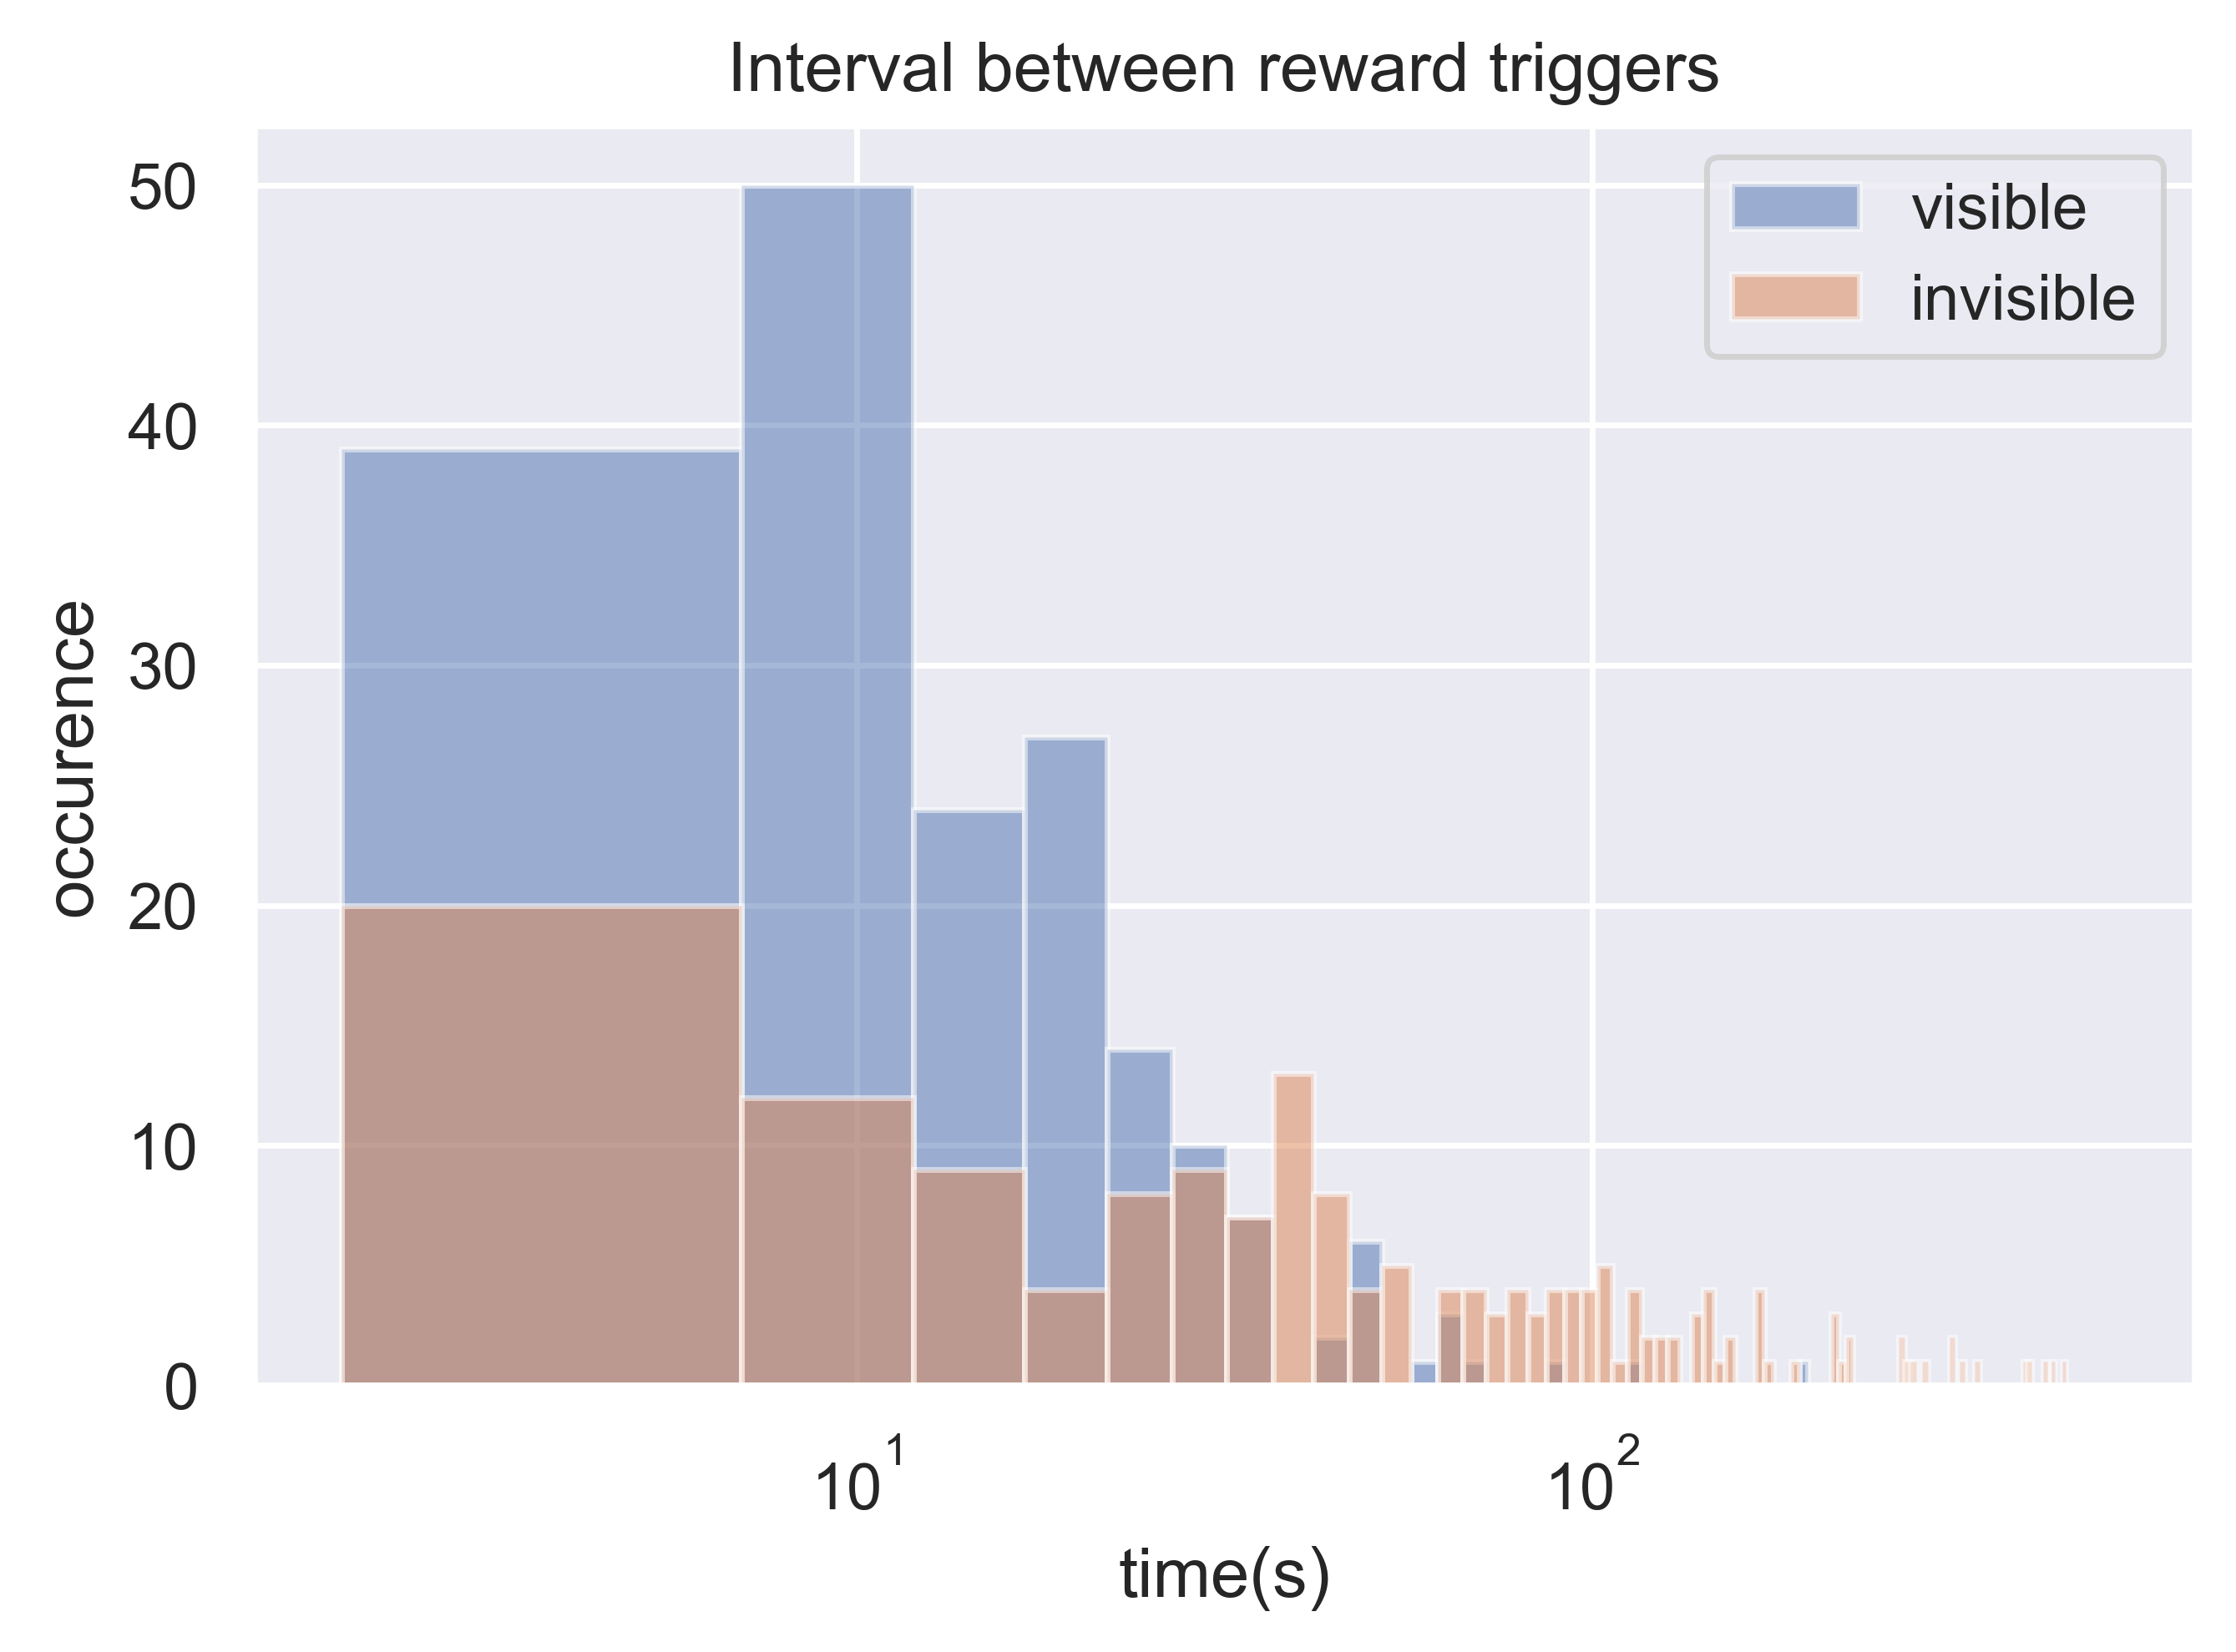

In [59]:
import scipy.stats as st
n_bins = 100 
rangehist = (2,500)
fig, ax = plt.subplots(dpi= 500)
time_range = np.arange(0,len(diff)/2)
ax.hist(visible, alpha = .5, bins=n_bins,histtype='bar',range =rangehist, label="visible")
ax.hist(invisible, alpha = .5, bins=n_bins,histtype='bar',range =rangehist,label="invisible")

ax.set_ylabel('occurence')
ax.set_xlabel('time(s)')
ax.set_title('Interval between reward triggers')
ax.legend(loc="upper right")
ax.set_xscale('log')

plt.savefig('%sTime_to_get_beacon_over_session_visible_invisible_all_.png' %(figures), dpi = 200) 



# clearly most ITI visible times are located in first 25 ms, and the invisible distribution has a long tail 

## Now look into the KDE plot 

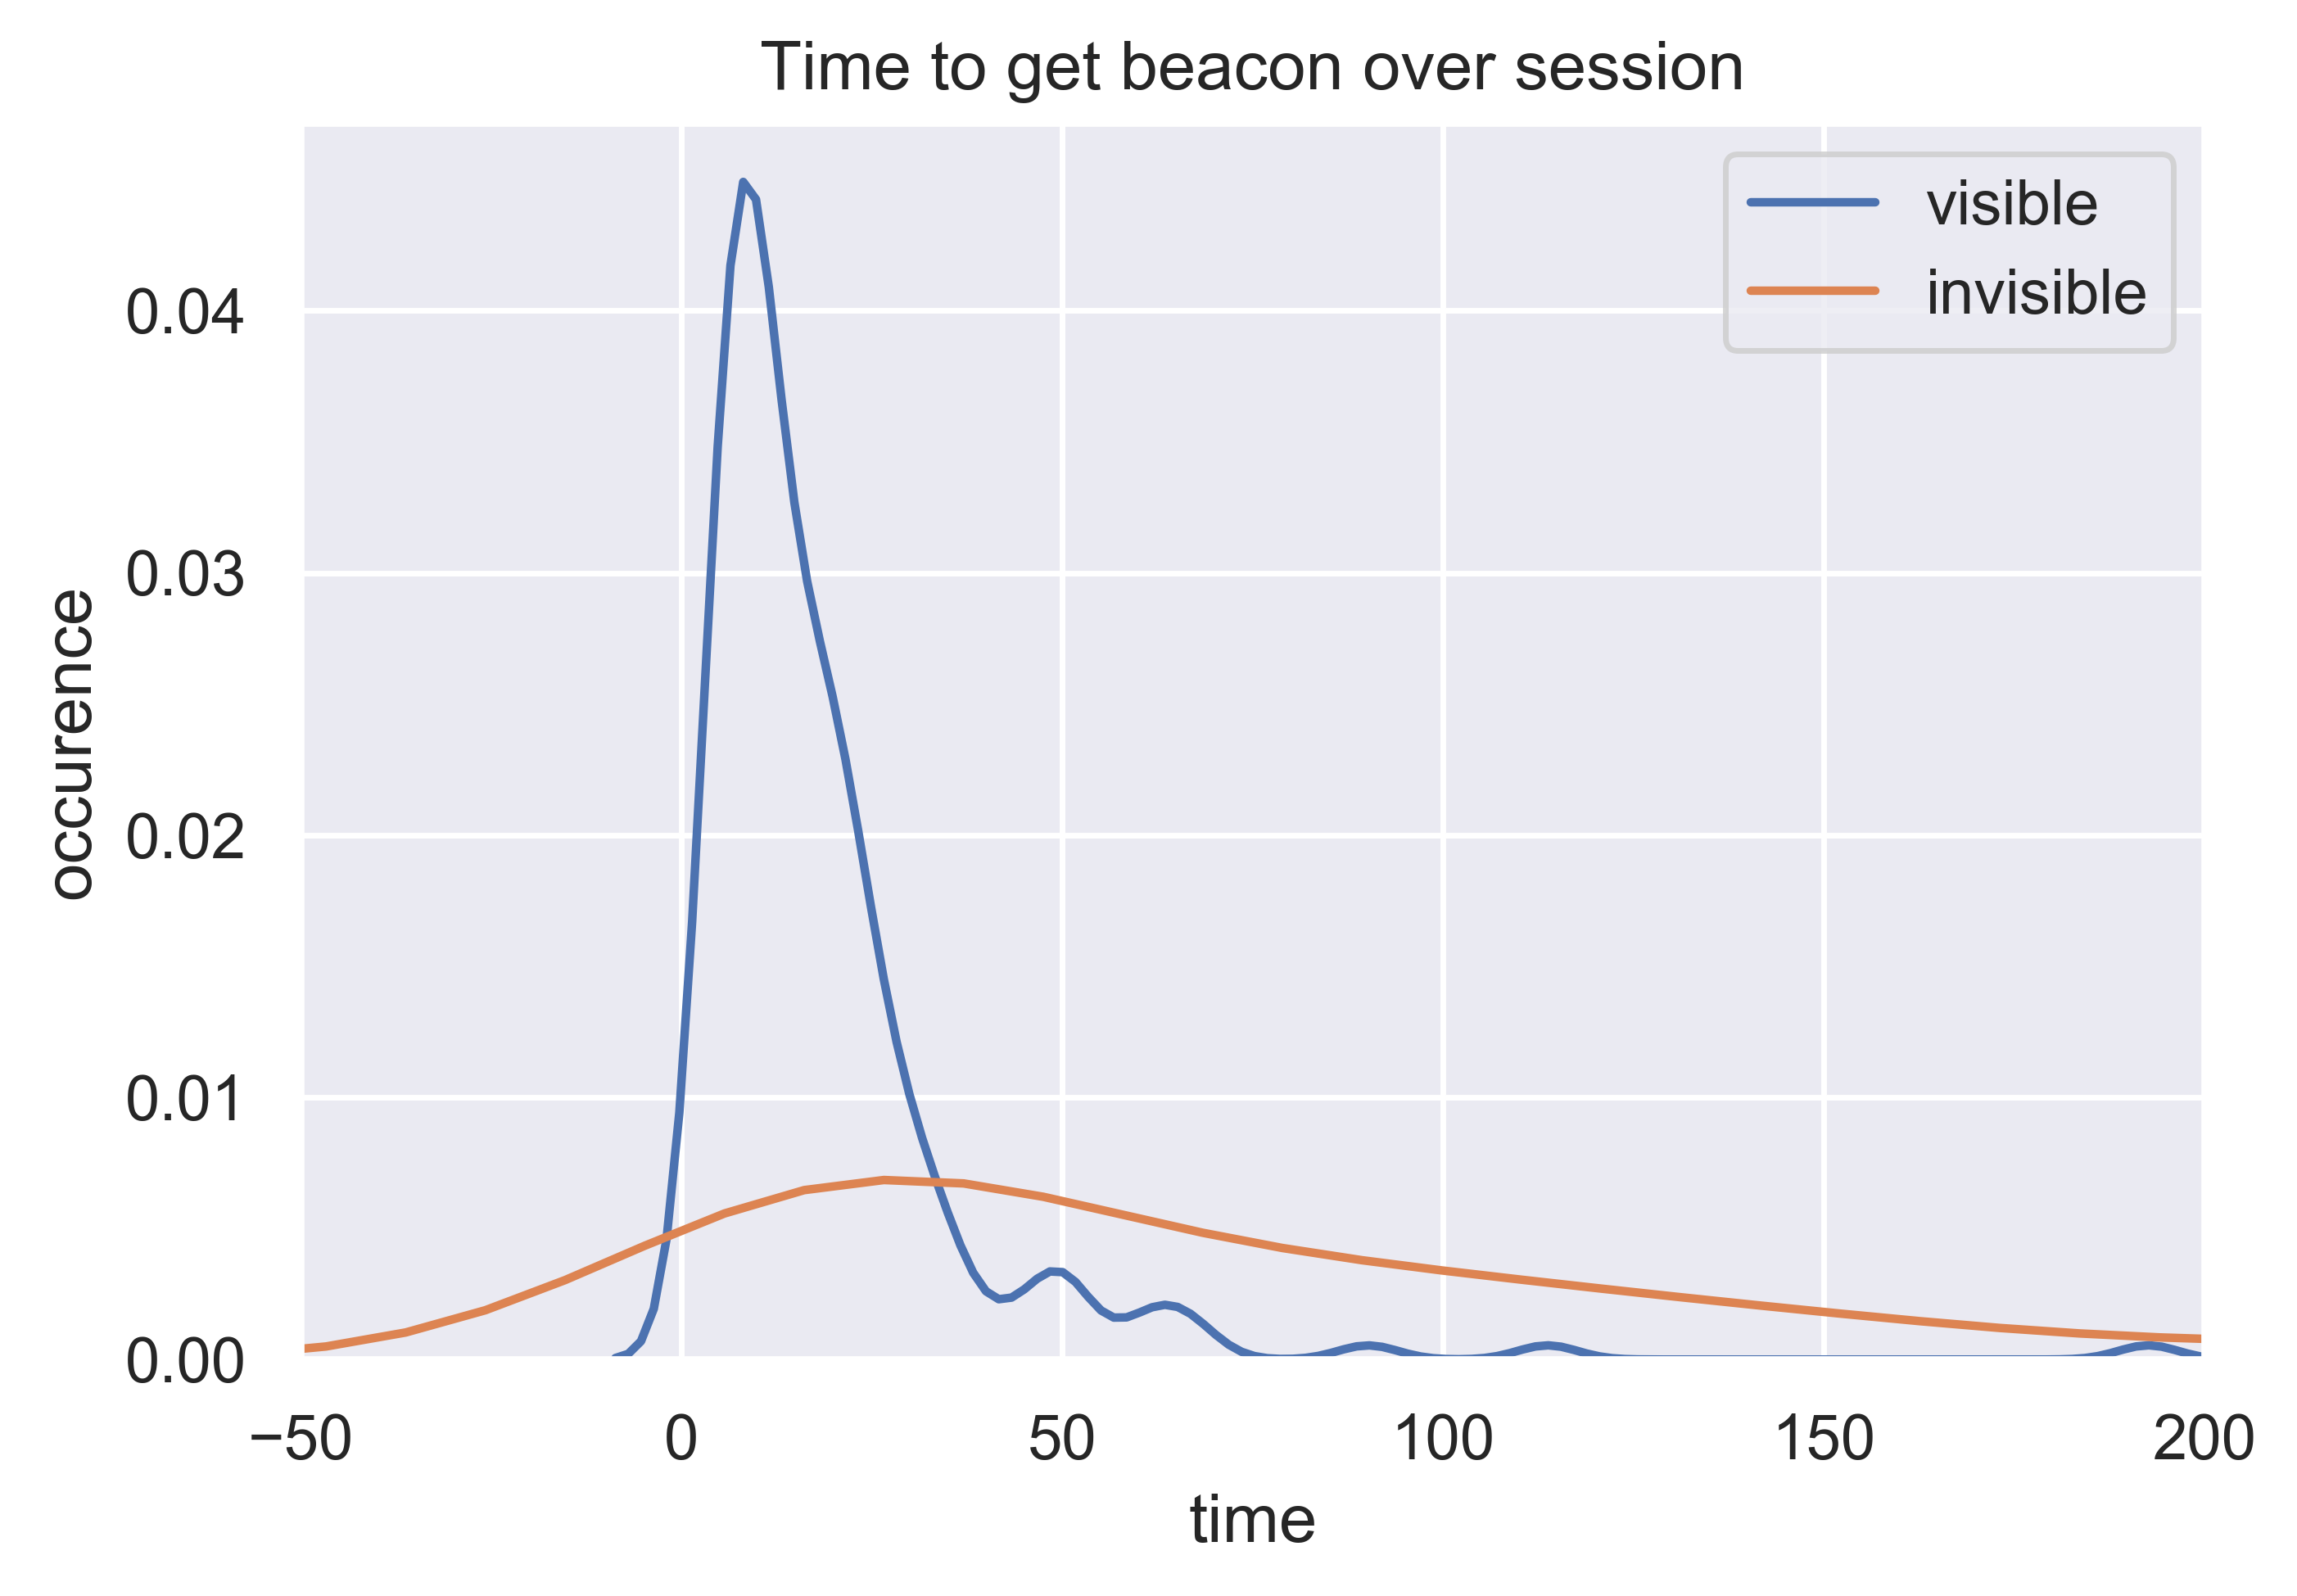

In [11]:
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
plt.figure(dpi=(500))
ax = sns.kdeplot(visible,label ='visible')
ax = sns.kdeplot(invisible,label ='invisible')
ax.set(xlim=(-50, 200))
ax.set_title('probability density - KDE of ITI')

ax.set_ylabel('occurence')
ax.set_xlabel('time')
ax.set_title('Time to get beacon over session')
plt.savefig('%sTime_to_get_beacon_over_session_visible_invisible_kde.png' %(figures), dpi = 200) 

## More covariaces and correlations

In [12]:
from numpy import cov 
from scipy.stats import pearsonr,spearmanr
visible_190 = visible+[18,19,19] # suplementing mean for better stats
corr2 = spearmanr(visible_190, invisible)
correlation = pearsonr (visible_190, invisible)
covariance = cov(visible_190, invisible)
print(corr2,correlation,covariance)


SpearmanrResult(correlation=-0.20413031735168258, pvalue=0.0047283239286661964) (-0.08594561800502526, 0.23838069168294773) [[  404.42766908  -285.06729496]
 [ -285.06729496 27202.3517048 ]]


## All the imports - need to be ran first 

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Circle
import matplotlib.tri as tri
import numpy as np
from scipy.spatial.transform import Rotation as R

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

#Data with beacon metadata

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)

beacon_Day87_fs2 = pd.read_csv(root+'beacons 20200129-153534.txt',sep=" ", header=None)
beacon_Day87_fs1 = pd.read_csv(root+'beacons 20200129-161806.txt',sep=" ", header=None)

beacon_Day88_fs2 = pd.read_csv(root+'beacons 20200130-102126.txt',sep=" ", header=None)
beacon_Day88_fs1 = pd.read_csv(root+'beacons 20200130-111741.txt',sep=" ", header=None)

beacon_Day89_fs2 = pd.read_csv(root+'beacons 20200130-161126.txt',sep=" ", header=None)
beacon_Day89_fs1 = pd.read_csv(root+'beacons 20200130-151829.txt',sep=" ", header=None)

beacon_Day90_fs2 = pd.read_csv(root+'beacons 20200203-154441.txt',sep=" ", header=None)
beacon_Day90_fs1 = pd.read_csv(root+'beacons 20200203-145842.txt',sep=" ", header=None)

beacon_Day91_fs2 = pd.read_csv(root+'beacons 20200204-125552.txt',sep=" ", header=None)
beacon_Day91_fs1 = pd.read_csv(root+'beacons 20200204-133905.txt',sep=" ", header=None)

beacon_Day92_fs2 = pd.read_csv(root+'beacons 20200205-143220.txt',sep=" ", header=None)
beacon_Day92_fs1 = pd.read_csv(root+'beacons 20200205-151052.txt',sep=" ", header=None)

beacon_Day93_fs2 = pd.read_csv(root+'beacons 20200206-133529.txt',sep=" ", header=None)
beacon_Day93_fs1 = pd.read_csv(root+'beacons 20200206-125706.txt',sep=" ", header=None)


Day46_fs1 = pd.read_csv(root+'position 20190923-174441.txt',sep=" ", header=None)
Day46_fs2 = pd.read_csv(root+'position 20190923-171112.txt',sep=" ", header=None)
Day47_fs1 = pd.read_csv(root+'position 20191001-112411.txt',sep=" ", header=None)
Day47_fs2 = pd.read_csv(root+'position 20191001-115127.txt',sep=" ", header=None)
Day48_fs1 = pd.read_csv(root+'position 20191002-115000.txt',sep=" ", header=None)
Day48_fs2 = pd.read_csv(root+'position 20191002-111038.txt',sep=" ", header=None)
Day51_fs1 = pd.read_csv(root+'position 20191106-170809.txt',sep=" ", header=None)
Day52_fs2 = pd.read_csv(root+'position 20191107-174215.txt',sep=" ", header=None)
Day52_fs1 = pd.read_csv(root+'position 20191107-183857.txt',sep=" ", header=None)
Day53_fs2 = pd.read_csv(root+'position 20191108-142321.txt',sep=" ", header=None)
Day53_fs1 = pd.read_csv(root+'position 20191108-145125.txt',sep=" ", header=None)
Day66_fs1 = pd.read_csv(root+'position 20191118-161325.txt',sep=" ", header=None)
Day66_fs2 = pd.read_csv(root+'position 20191118-171209.txt',sep=" ", header=None)
Day72_fs1 = pd.read_csv(root+'position 20191127-122008.txt',sep=" ", header=None)
Day72_fs2 = pd.read_csv(root+'position 20191127-132223.txt',sep=" ", header=None)


Day79_fs2 = pd.read_csv(root+'position 20200121-154004.txt',sep=" ", header=None)
Day79_fs1 = pd.read_csv(root+'position 20200121-161359.txt',sep=" ", header=None)

Day80_fs2 = pd.read_csv(root+'position 20200122-141738.txt',sep=" ", header=None)
Day80_fs1 = pd.read_csv(root+'position 20200122-133022.txt',sep=" ", header=None)

Day81_fs2 = pd.read_csv(root+'position 20200123-141930.txt',sep=" ", header=None)
Day81_fs1 = pd.read_csv(root+'position 20200123-150059.txt',sep=" ", header=None)

Day82_fs2 = pd.read_csv(root+'position 20200124-151642.txt',sep=" ", header=None)
Day82_fs1 = pd.read_csv(root+'position 20200124-160826.txt',sep=" ", header=None)

Day83_fs2 = pd.read_csv(root+'position 20200126-183810.txt',sep=" ", header=None)
Day83_fs1 = pd.read_csv(root+'position 20200126-180200.txt',sep=" ", header=None)

Day84_fs2 = pd.read_csv(root+'position 20200127-205615.txt',sep=" ", header=None)
Day84_fs1 = pd.read_csv(root+'position 20200127-155645.txt',sep=" ", header=None)

Day85_fs2 = pd.read_csv(root+'position 20200128-112255.txt',sep=" ", header=None)
Day85_fs1 = pd.read_csv(root+'position 20200128-104637.txt',sep=" ", header=None)

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

Day87_fs2 = pd.read_csv(root+'position 20200129-153534.txt',sep=" ", header=None)
Day87_fs1 = pd.read_csv(root+'position 20200129-161806.txt',sep=" ", header=None)

Day88_fs2 = pd.read_csv(root+'position 20200130-102126.txt',sep=" ", header=None)
Day88_fs1 = pd.read_csv(root+'position 20200130-111741.txt',sep=" ", header=None)

Day89_fs2 = pd.read_csv(root+'position 20200130-161126.txt',sep=" ", header=None)
Day89_fs1 = pd.read_csv(root+'position 20200130-151829.txt',sep=" ", header=None)

Day90_fs2 = pd.read_csv(root+'position 20200203-154441.txt',sep=" ", header=None)
Day90_fs1 = pd.read_csv(root+'position 20200203-145842.txt',sep=" ", header=None)

Day91_fs2 = pd.read_csv(root+'position 20200204-125552.txt',sep=" ", header=None)
Day91_fs1 = pd.read_csv(root+'position 20200204-133905.txt',sep=" ", header=None)

Day92_fs2 = pd.read_csv(root+'position 20200205-143220.txt',sep=" ", header=None)
Day92_fs1 = pd.read_csv(root+'position 20200205-151052.txt',sep=" ", header=None)

Day93_fs2 = pd.read_csv(root+'position 20200206-133529.txt',sep=" ", header=None)
Day93_fs1 = pd.read_csv(root+'position 20200206-125706.txt',sep=" ", header=None)